<a href="https://colab.research.google.com/github/vk4nubip/nubip-DS-ML/blob/main/Classification_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
#### Load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeClassifier, plot_tree # import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # import Random Forest Classifier

from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn import metrics # import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder  # One-Hot Encoding

from sklearn.datasets import load_diabetes  # load dataset "Diabetes"
from sklearn.datasets import fetch_openml   # get datasets from openml.org

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## ---------
# import other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

# **Load Datasets**

## Churn_Modeling.csv

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling.csv"
churn_df = pd.read_csv(url)
churn_df.drop("RowNumber", axis=1, inplace=True)  # drop the column

## OR
#### Loading Data from Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#churn_df = pd.read_csv("/content/drive/My Drive/Churn_Modelling.csv")

# Rename column
churn_df.rename(columns={'NumOfProducts': 'NumOfProds'}, inplace = True)
churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**This case involves customer churn modeling for a bank**. The goal is to predict which customers are likely to leave the bank's services (churn) based on various customer attributes.

**The dataset** contains information for many customers, including their demographics (like age, gender, location), financial details (credit score, balance, salary), and relationship history with the bank (tenure, products used, activity status). The key variable is 'Exited', which indicates whether a specific customer has already churned (1) or not (0).

By analyzing these features, the bank aims to build a predictive model to identify at-risk customers early, allowing them to implement retention strategies.

***Variables***:

* CustomerId: A unique identifier assigned to each customer.
* Surname: The last name of the customer.
* CreditScore: A measure of the customer's creditworthiness, ranging from 0 to 1000. A higher score indicates better credit.
* Geography: The country where the customer resides (e.g., France, Spain, Germany).
* Gender: The gender of the customer (e.g., Male, Female).
* Age: The age of the customer in years.
* Tenure: The number of years the customer has been with the bank.
* Balance: The amount of money held in the customer's bank account.
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card).
* HasCrCard: A binary indicator (0 or 1) showing if the customer has a credit card with the bank.
* IsActiveMember: A binary indicator (0 or 1) showing if the customer is an active member.
* EstimatedSalary: The estimated annual salary of the customer.
* Exited: The target variable, a binary indicator (0 or 1) showing if the customer has churned (1) or not (0).

## Diabetes.csv

In [ ]:
#### Loading Data
diabetes_df = fetch_openml(data_id=43582, as_frame=True)['frame']
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [ ]:
## Rename columns
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

diabetes_df.columns = col_names
diabetes_df.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0


**Problem Statement** NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**The dataset** consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more:

* Pregnancies - Pregnancies Number of times
* Glucose - Glucose Plasma concentration in an oral glucose tolerance test
* BloodPressure - Blood Pressure Diastolic blood (mm Hg)
* SkinThickness - Skin Thickness Triceps (mm)
* Insulin - Insulin Two hour serum
* BMI - Body Mass Index Diabetes
* DiabetesPedigreeFunction - Pedigree Function Diabetes
* Age - Age in years

Finally,

* Outcome - Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0 Inspiration

## Dry_Bean.csv

In [ ]:
url = "https://archive.ics.uci.edu/static/public/602/data.csv"
bean_df = pd.read_csv(url)

OR take data from UCI repository

In [ ]:
#pip install ucimlrepo

#from ucimlrepo import fetch_ucirepo

#### fetch dataset
#dry_bean = fetch_ucirepo(id=602)

#### data (as pandas dataframes)
#X = dry_bean.data.features
#y = dry_bean.data.targets

#### metadata
#print(dry_bean.metadata)
#variable information
#print(dry_bean.variables)

**Abstract**:\
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

* Number of Instances (records in your data set): 13611
* Number of Attributes (fields within each record): 17


__Relevant Information:__
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

__Attribute Information__:
1. *Area* (A): The area of a bean zone and the number of pixels within its boundaries.
2. *Perimeter* (P): Bean circumference is defined as the length of its border.
3. *Major axis length* (L): The distance between the ends of the longest line that can be drawn from a bean.
4. *Minor axis length* (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. *Aspect ratio* (K): Defines the relationship between L and l.
6. *Eccentricity* (Ec): Eccentricity of the ellipse having the same moments as the region.
7. *Convex area* (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. *Equivalent diameter* (Ed): The diameter of a circle having the same area as a bean seed area.
9. *Extent* (Ex): The ratio of the pixels in the bounding box to the bean area.
10. *Solidity* (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. *Roundness* (R): Calculated with the following formula: (4piA)/(P^2)
12. *Compactness* (CO): Measures the roundness of an object: Ed/L
13. *ShapeFactor1* (SF1)
14. *ShapeFactor2* (SF2)
15. *ShapeFactor3* (SF3)
16. *ShapeFactor4* (SF4)
17. __*Class*__ (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

***Source***:\
Murat KOKLU, Ilker Ali OZKAN \
Faculty of Technology,\
Selcuk University, TURKEY. \
ORCID : 0000-0002-2737-2360, 0000-0002-5715-1040 \
mkoklu@selcuk.edu.tr, ilkerozkan@selcuk.edu.tr

__Links:__ 
1. https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
2. https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset?resource=download&select=Dry_Bean.csv

## Cell_samples.csv

This dataset is publicly available from the UCI Machine Learning Repository -Asuncion and Newman, 2007-(http://mlearn.ics.uci.edu/MLRepository.html). The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The objective is to classify cells to whether the samples are benign or malignant.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are
* **benign**: value = 2,
* or **malignant**: value = 4.

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
cell_df = pd.read_csv(url); cell_df[10:50].head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
10,1035283,1,1,1,1,1,1,3,1,1,2
11,1036172,2,1,1,1,2,1,2,1,1,2
12,1041801,5,3,3,3,2,3,4,4,1,4
13,1043999,1,1,1,1,2,3,3,1,1,2
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
16,1048672,4,1,1,1,2,1,2,1,1,2
17,1049815,4,1,1,1,2,1,3,1,1,2
18,1050670,10,7,7,6,4,10,4,1,2,4
19,1050718,6,1,1,1,2,1,3,1,1,2


In [ ]:
cell_df_c = cell_df.copy()
cell_df_c['Class'] = np.where(cell_df_c['Class'] == 2, "benign", "malignant")
cell_df_c[10:50].head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
10,1035283,1,1,1,1,1,1,3,1,1,benign
11,1036172,2,1,1,1,2,1,2,1,1,benign
12,1041801,5,3,3,3,2,3,4,4,1,malignant
13,1043999,1,1,1,1,2,3,3,1,1,benign
14,1044572,8,7,5,10,7,9,5,5,4,malignant
15,1047630,7,4,6,4,6,1,4,3,1,malignant
16,1048672,4,1,1,1,2,1,2,1,1,benign
17,1049815,4,1,1,1,2,1,3,1,1,benign
18,1050670,10,7,7,6,4,10,4,1,2,malignant
19,1050718,6,1,1,1,2,1,3,1,1,benign


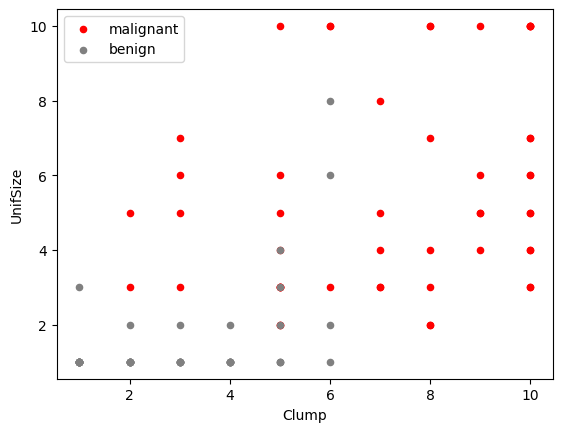

In [ ]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Grey', label='benign', ax=ax);
plt.show()

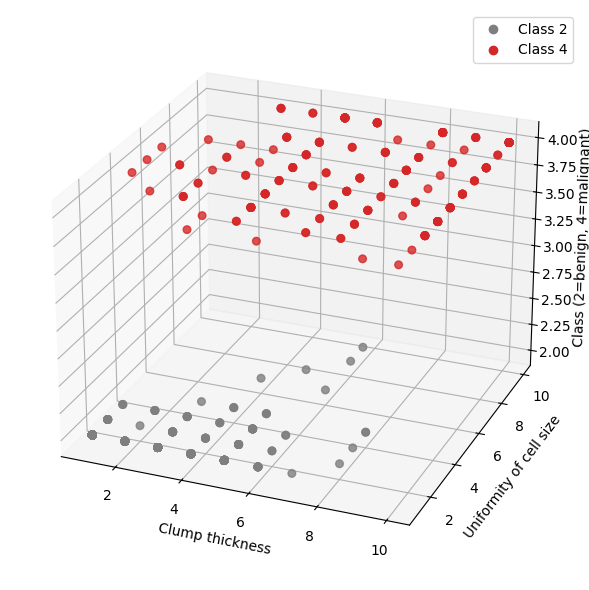

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map:
colors = {2: 'tab:gray', 4: 'tab:red'}
c = cell_df['Class'].map(colors)

# Points
sc = ax.scatter(
    cell_df['Clump'],
    cell_df['UnifSize'],
    cell_df['Class'],
    c=c,
    s=30,
    alpha=0.8
)

# Axis Names and Title
ax.set_xlabel('Clump thickness')
ax.set_ylabel('Uniformity of cell size')
ax.set_zlabel('Class (2=benign, 4=malignant)', labelpad=2)
#ax.set_title('3-D scatter: Clump vs UnifSize vs Class')

# Legend
handles = [plt.Line2D([], [], marker='o', ls='', color=colors[k], label=f'Class {k}') for k in colors]
ax.legend(handles=handles)

# Angle of View
ax.view_init(elev=25, azim=-68)

plt.tight_layout()
plt.show()

# **Binary Classification**

## **Diabetes: Decision Tree**

In [ ]:
# Divide given columns into two types of variables dependent (target variable) and independent variables (feature variables).
# In other words, split dataset in features and target variable.
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_df[feature_cols] # Features
y = diabetes_df.label         # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


**Feature Importances**

In [ ]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


Feature Importances:
glucose     0.562837
bmi         0.326594
age         0.110569
insulin     0.000000
pregnant    0.000000
bp          0.000000
pedigree    0.000000
dtype: float64


**Classification report**

In [ ]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       146
         1.0       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



**Confusion Matrix**

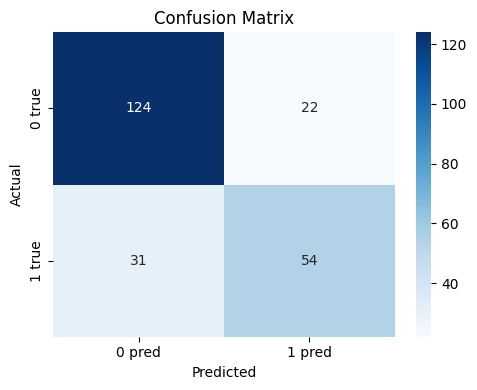

In [ ]:
#### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

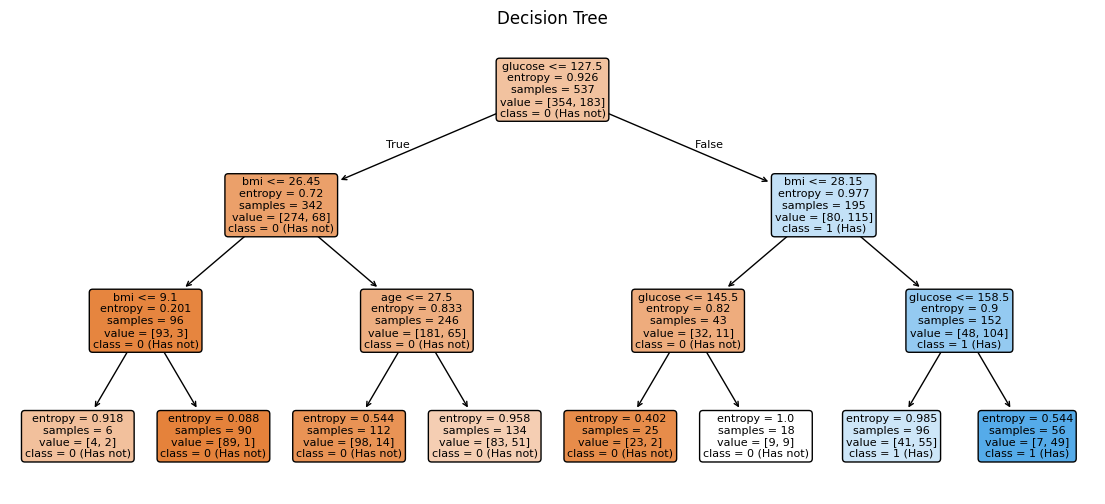

In [ ]:
plt.figure(figsize=(14, 6))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['0 (Has not)', '1 (Has)'],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## **Churn: Decision Tree**

In [ ]:
#### Feature Selection
# Split dataset into dependent (target variable) and independent variables (feature variables)
feature_cols = ['CreditScore', 'Geography', 'Gender', 'Age','Tenure','Balance','NumOfProds', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = churn_df[feature_cols]  # Features
y = churn_df.Exited         # Target variable
display(churn_df.head(3))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


**One-Hot Encoding**

In [ ]:
#### One-Hot Encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist() # Create a one-hot encoder object
encoder = OneHotEncoder(sparse_output=False) # Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X[categorical_columns]) # Create a DataFrame with the one-hot encoded columns

# We use get_feature_names_out() to get the column names for the encoded data
one_hot_churn_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)) # Concatenate the one-hot encoded dataframe with the original dataframe

churn_df_encoded = pd.concat([X, one_hot_churn_df], axis=1)
churn_df_encoded.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Drop the original categorical columns
X_encoded_churn = churn_df_encoded.drop(categorical_columns, axis=1)

#### Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_churn, y, test_size=0.4, random_state=1234) # 60% train and 40% test

#### Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating the Model
# Model Accuracy, how often is the classifier correct?
print('Train and test size:', y_train.shape[0], ' and ',  y_test.shape[0])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Train and test size: 6000  and  4000
Accuracy: 0.847
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      3185
           1       0.77      0.35      0.48       815

    accuracy                           0.85      4000
   macro avg       0.81      0.66      0.70      4000
weighted avg       0.84      0.85      0.82      4000



In [ ]:
# Feature Importances
feature_importance = clf.feature_importances_
feature_names = X_encoded_churn.columns
feature_importances = pd.DataFrame({'feature':feature_names, 'importance':feature_importance})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

              feature  importance
1                 Age    0.476238
4          NumOfProds    0.329105
6      IsActiveMember    0.106799
3             Balance    0.040442
9   Geography_Germany    0.031486
7     EstimatedSalary    0.015931
0         CreditScore    0.000000
2              Tenure    0.000000
5           HasCrCard    0.000000
8    Geography_France    0.000000
10    Geography_Spain    0.000000
11      Gender_Female    0.000000
12        Gender_Male    0.000000


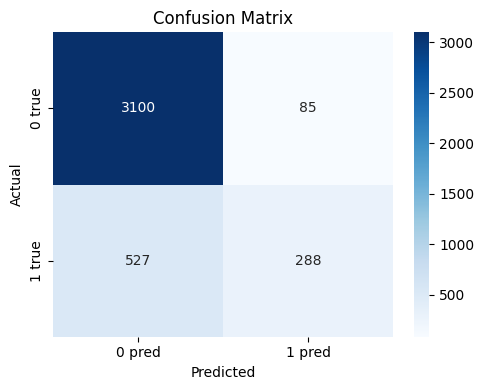

In [ ]:
#### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

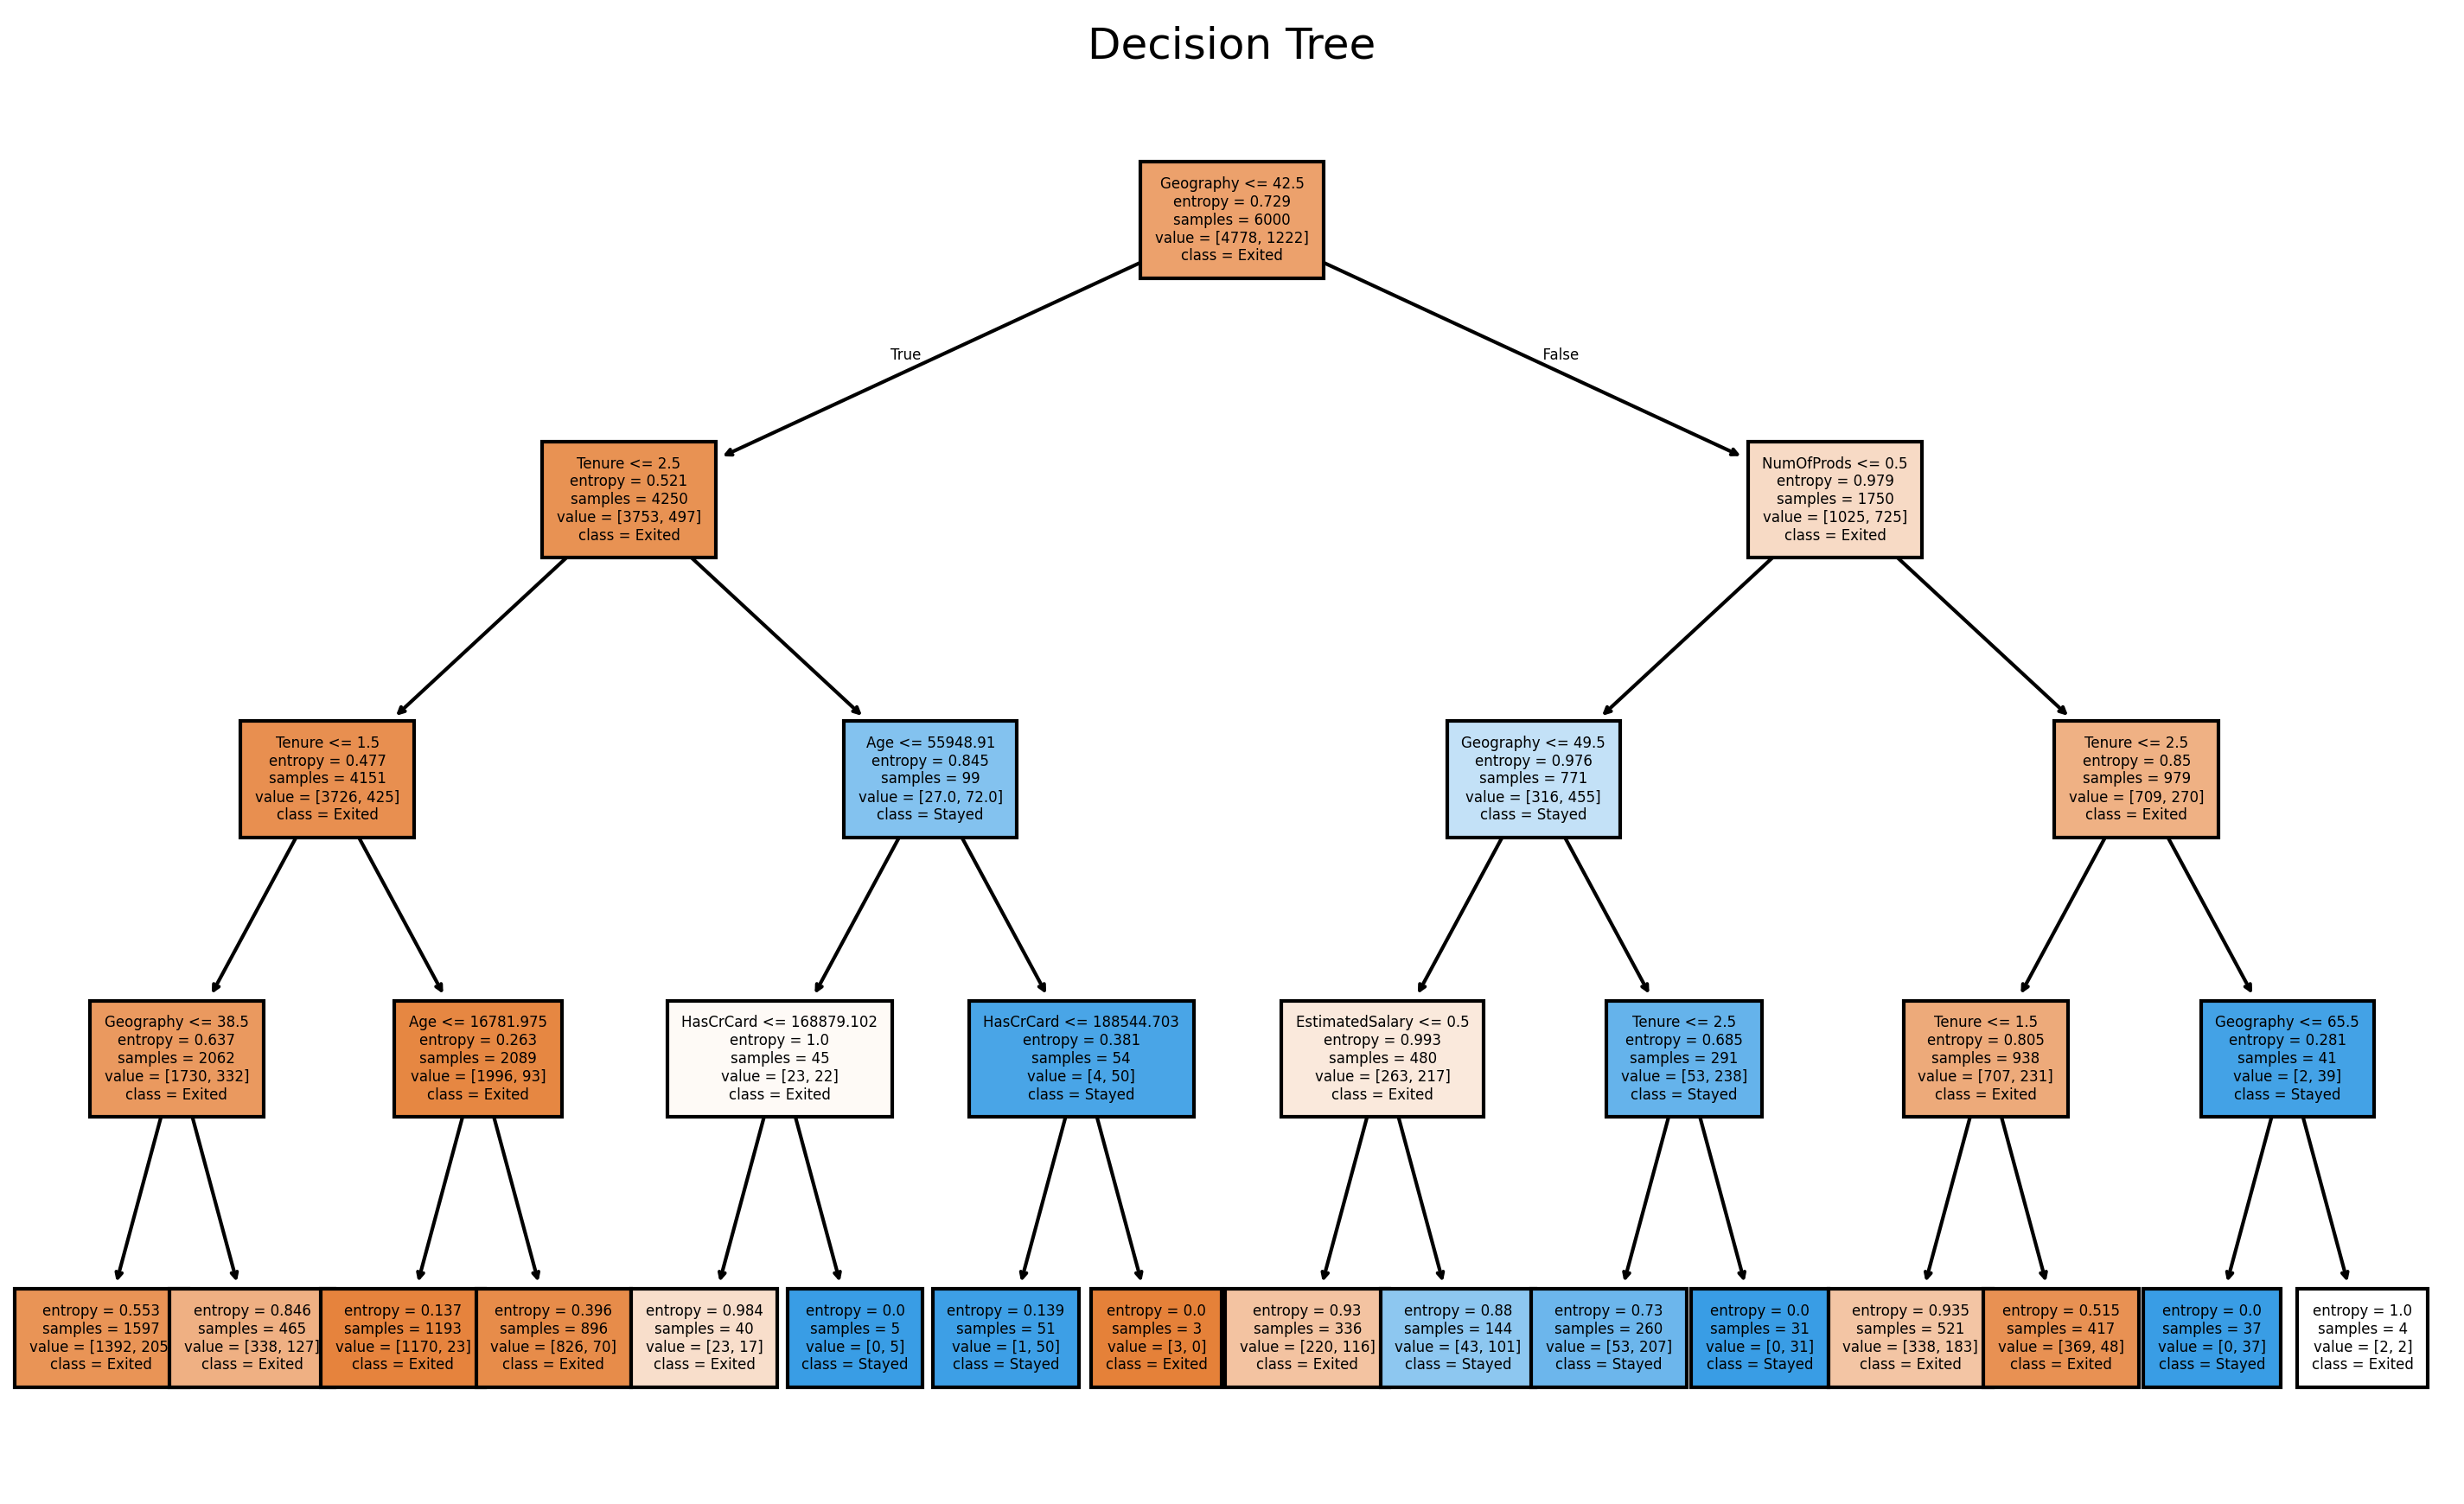

In [ ]:
#### Plot Decision Tree
plt.figure(figsize=(12,7), dpi=300)
plot_tree(clf, feature_names=feature_cols, filled=True, class_names=["Exited", "Stayed"], fontsize=4)
plt.title("Decision Tree"); plt.show()

## **Churn: Random Forest**

**Random Forest Classifier**

In [ ]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=30)
clf = clf.fit(X_train, y_train) # Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print('Train and test size:', y_train.shape[0], ' and ',  y_test.shape[0])
print("Classification Report: \n", classification_report(y_test, y_pred))

Train and test size: 6000  and  4000
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      3185
           1       0.77      0.46      0.57       815

    accuracy                           0.86      4000
   macro avg       0.82      0.71      0.74      4000
weighted avg       0.85      0.86      0.85      4000



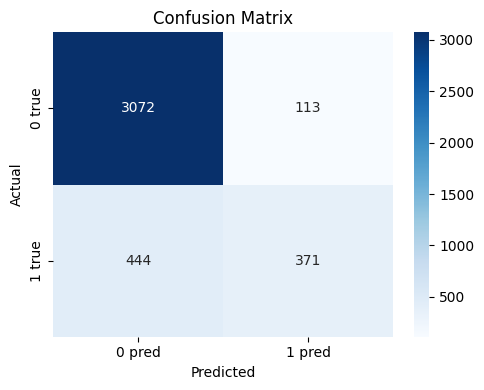

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
display(X_test.reset_index(drop=True)[3959:3964],
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['Predicted Exited']).tail(50)], axis = 1)[3959:3964])

,CreditScore,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3959,772,30,4,78653.05,1,1,0,1790.48,0.0,0.0,1.0,0.0,1.0
3960,628,50,4,122227.71,1,0,1,14217.77,0.0,1.0,0.0,0.0,1.0
3961,729,30,9,0.00,2,1,0,151869.35,1.0,0.0,0.0,0.0,1.0
3962,637,41,2,138014.40,2,1,0,140298.24,0.0,1.0,0.0,0.0,1.0
3963,540,35,7,128369.75,2,1,0,198256.15,0.0,1.0,0.0,1.0,0.0


,Exited,Predicted Exited
3959,0,0.0
3960,1,1.0
3961,0,0.0
3962,0,0.0
3963,0,0.0


# **Multi-Class Classification**

## **Beans: Random Forest**

In [ ]:
y = bean_df.Class  # Target
X = bean_df.drop(y.name, axis=1)    # Features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30)
clf = clf.fit(X_train, y_train) # Predict the response for test dataset
y_pred = clf.predict(X_test)

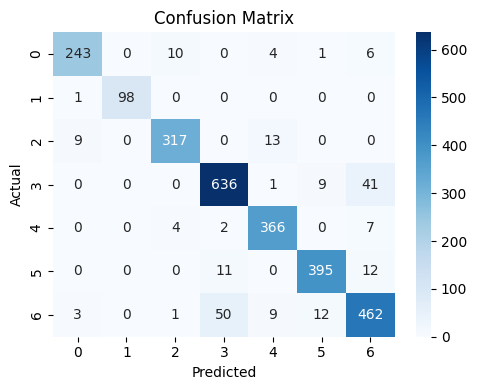

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
print("Unique classes seen by the model (textual, in order of their internal encoding):")
print(clf.classes_)
print('\n')

for i, class_name in enumerate(clf.classes_):
    print(f"{i}: {class_name}")

Unique classes seen by the model (textual, in order of their internal encoding):
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


0: BARBUNYA
1: BOMBAY
2: CALI
3: DERMASON
4: HOROZ
5: SEKER
6: SIRA


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       264
      BOMBAY       1.00      0.99      0.99        99
        CALI       0.95      0.94      0.94       339
    DERMASON       0.91      0.93      0.92       687
       HOROZ       0.93      0.97      0.95       379
       SEKER       0.95      0.94      0.95       418
        SIRA       0.88      0.86      0.87       537

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [ ]:
pd.concat([y_test.reset_index(drop=True).head(3), pd.DataFrame(y_pred, columns=['Pred']).head(3)], axis = 1)

,Class,Pred
0,SEKER,SEKER
1,SIRA,SEKER
2,BOMBAY,BOMBAY


In [ ]:
test_row = 1

if len(X_test) > 0:
    sample_prediction_proba = clf.predict_proba(X_test.iloc[[ test_row ]])[0]
    print(f"\nProbabilities for {test_row} test sample ({y_test.iloc[ test_row ]}):")
    for i, class_name in enumerate(clf.classes_):
        print(f"  Class '{class_name}' (index {i}): {sample_prediction_proba[i]:.4f}")

    sample_prediction = clf.predict(X_test.iloc[[ test_row ]])[0]
    print(f"Predicted class: {sample_prediction}")


Probabilities for 1 test sample (SIRA):
  Class 'BARBUNYA' (index 0): 0.0000
  Class 'BOMBAY' (index 1): 0.0000
  Class 'CALI' (index 2): 0.0000
  Class 'DERMASON' (index 3): 0.1140
  Class 'HOROZ' (index 4): 0.0000
  Class 'SEKER' (index 5): 0.6480
  Class 'SIRA' (index 6): 0.2380
Predicted class: SEKER


# **Multiple Classifier Pipeline**

## **Preparing Data**

In [ ]:
display( churn_df.head(3) )
X = churn_df.drop(['Exited', 'CustomerId', 'Surname'] , axis = 1)  # Features
y = churn_df.Exited                    # Target variable

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)
print('Train and test size:', y_train.shape[0], ' and ',  y_test.shape[0])

Train and test size: 6000  and  4000


## **Preprocessor**

In [ ]:
# Select categorical variables for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# Select numeric valiables for scaling (standartization or normalization)
numerical_features = X.select_dtypes(include=['float']).columns.tolist()
# Select integer valiables
integer_features = X.select_dtypes(include=['int']).columns.tolist()

In [ ]:
# Select standartization or normalization
scale_type   = "minmax"         # "standard" or "minmax"

if scale_type == "standard":
    scaler = StandardScaler()
else:
    scaler = MinMaxScaler()

# Apply ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
        transformers=[
             # One-Hot Encoding categorical variables
             ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features),
             ('num', scaler, numerical_features),   # Scaling numerical variables
             ('int_pass', 'passthrough', integer_features)   # Add integers WITHOUT scaling
        ],
        remainder='drop'          ## Ignore other columns
)

## **Classifiers**

In [ ]:
# Determine classifires
classifiers = {
    ## Logistic Regression
    'LR': LogisticRegression(
                          max_iter = 1000
                        , solver = 'liblinear'        # 'liblinear'  /  'lbfgs'
                        , class_weight='balanced'     # 'balanced'  /  None
                        , random_state=1234
                        , n_jobs=2
                        , C = np.float64(0.1)
        ),
    # Support Vector Machine
    'SVM': SVC(
                          kernel='linear'  # 'linear' 'rbf'
                        , probability=False
        ),
    ## Gradient Boosting Machine
    'GBM': GradientBoostingClassifier(
                          n_estimators = 600
                        , learning_rate = 0.04
                        , max_depth = 32
                        , min_samples_split = 4
                        , min_samples_leaf = 8
                        , max_features = 'sqrt'
                        , random_state=1234
        ),
    ## Light Gradient Boosting Machine
    'LGB': LGBMClassifier(
                          boosting_type='dart'
                        , num_leaves=63
                        , max_depth=6
                        , learning_rate=0.1
                        , n_estimators=201
                        , class_weight={0: 1, 1: 3.93}
                        , min_child_samples=20
                        , colsample_bytree=0.6
                        , reg_alpha=1.0
                        , reg_lambda=1.0
                        , max_features = 'sqrt'
                        , n_jobs=-1
                        , importance_type='gain'
        ),
    ## Random Forest
    'RF': RandomForestClassifier(
                          criterion = "gini"  # "entropy"  "gini"
                        , n_estimators = 1000
                        , max_depth = 30
                        , class_weight = "balanced"     # "balanced"  /  None
                        , min_samples_split = 47
                        , min_samples_leaf = 7
                        , max_features = 'sqrt'       # “sqrt”  /  “log2”  /  None
                        , bootstrap = True
                        , random_state=1234
                        , n_jobs=-1
        )
}

In [ ]:
# Creating pipelines for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

## **Training and Results**

In [ ]:
# ~~~ is OUTSIDE the scope of the main manual ~~~~~
# Прапорець, щоб переконатися, що ми показуємо X_train лише один раз
is_x_train_displayed = False
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


--- Перші 3 рядки X_train ПІСЛЯ трансформації ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Male,num__Balance,num__EstimatedSalary,int_pass__CreditScore,int_pass__Age,int_pass__Tenure,int_pass__NumOfProds,int_pass__HasCrCard,int_pass__IsActiveMember
0,1.0,0.0,1.0,0.609492,0.139029,646.0,50.0,6.0,2.0,1.0,1.0
1,0.0,0.0,0.0,0.000000,0.853131,535.0,45.0,2.0,2.0,0.0,1.0
2,0.0,0.0,0.0,0.000000,0.634986,641.0,40.0,7.0,1.0,1.0,0.0


----------------------------------------

LR Accuracy: 0.7170
ROC-AUC  : 0.7004
              precision    recall  f1-score   support

           0     0.8968    0.7284    0.8039      3185
           1     0.3878    0.6724    0.4919       815

    accuracy                         0.7170      4000
   macro avg     0.6423    0.7004    0.6479      4000
weighted avg     0.7931    0.7170    0.7403      4000



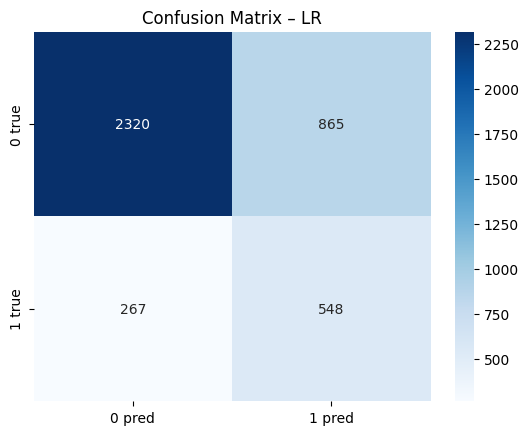

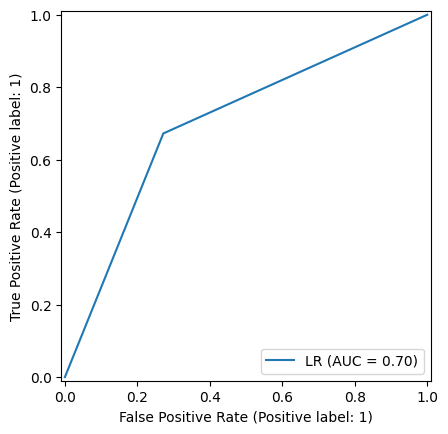

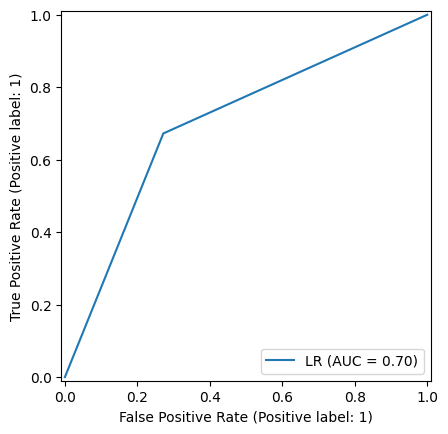

SVM Accuracy: 0.8135
ROC-AUC  : 0.5921
              precision    recall  f1-score   support

           0     0.8284    0.9658    0.8919      3185
           1     0.6202    0.2184    0.3230       815

    accuracy                         0.8135      4000
   macro avg     0.7243    0.5921    0.6075      4000
weighted avg     0.7860    0.8135    0.7760      4000



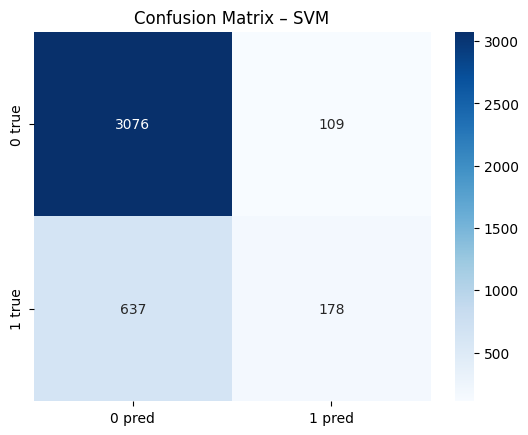

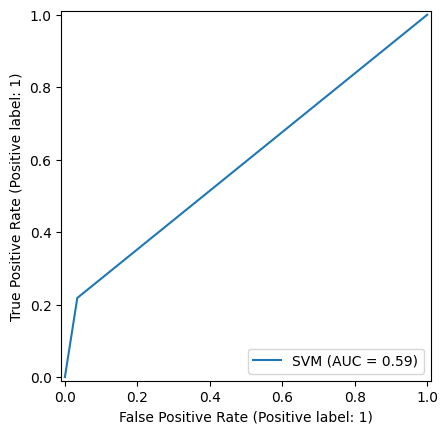

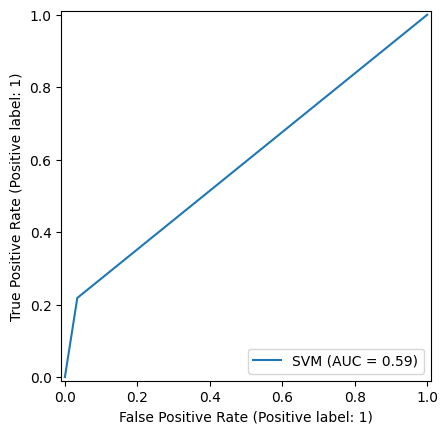

GBM Accuracy: 0.8535
ROC-AUC  : 0.7076
              precision    recall  f1-score   support

           0     0.8737    0.9538    0.9120      3185
           1     0.7189    0.4613    0.5620       815

    accuracy                         0.8535      4000
   macro avg     0.7963    0.7076    0.7370      4000
weighted avg     0.8422    0.8535    0.8407      4000



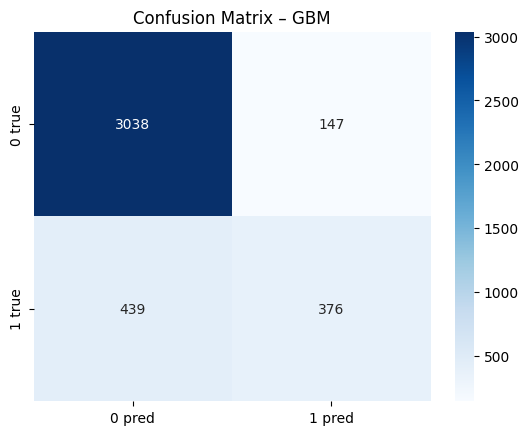

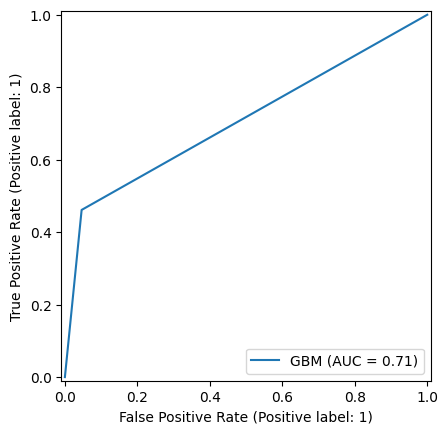

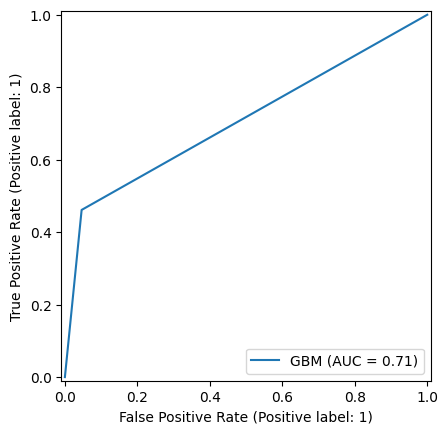

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 1222, number of negative: 4778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501277 -> initscore=0.005106
[LightGBM] [Info] Start training from score 0.005106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
LGB Accuracy: 0.8205
ROC-AUC  : 0.7750
              precision    recall  f1-score   support

           0     0.9169    0.8518    0.8831      3185
           1     0.5466    0.6982    0.6131       815

    accuracy                         0.8205      4000
   macro avg     0.7317    0.7750    0.7481      4000
weighted avg     0.8414    0.8205    0.8281      4000



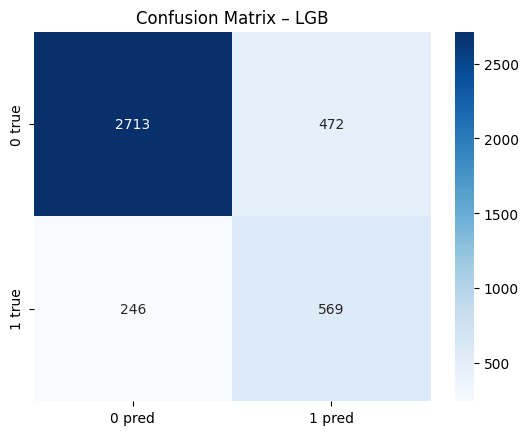

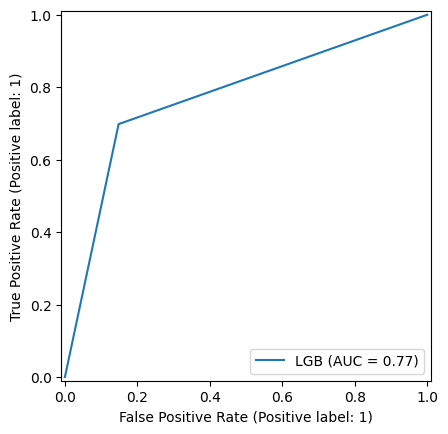

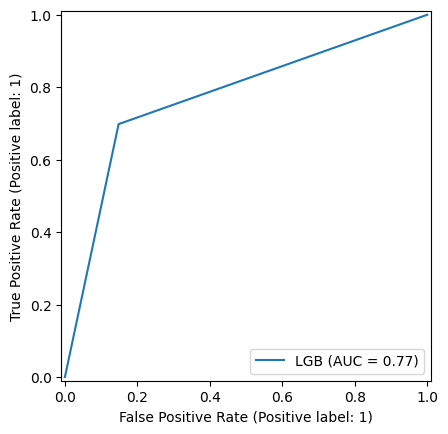

RF Accuracy: 0.8225
ROC-AUC  : 0.7717
              precision    recall  f1-score   support

           0     0.9143    0.8575    0.8850      3185
           1     0.5518    0.6859    0.6116       815

    accuracy                         0.8225      4000
   macro avg     0.7331    0.7717    0.7483      4000
weighted avg     0.8404    0.8225    0.8293      4000



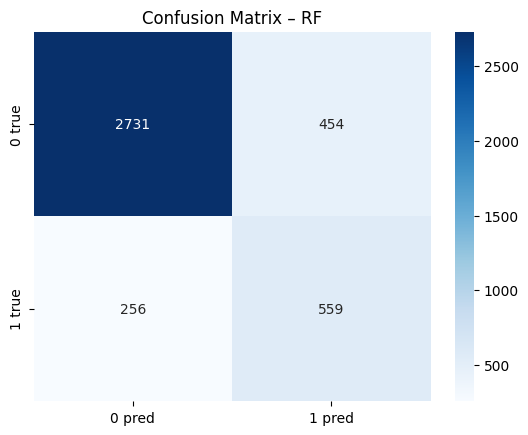

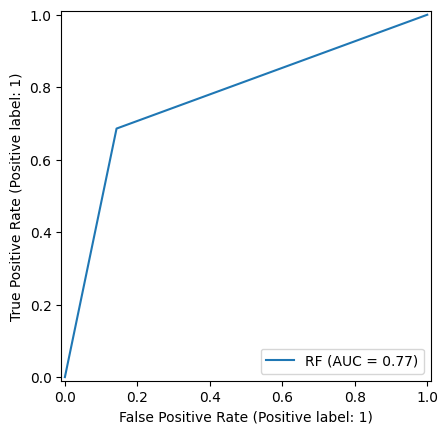

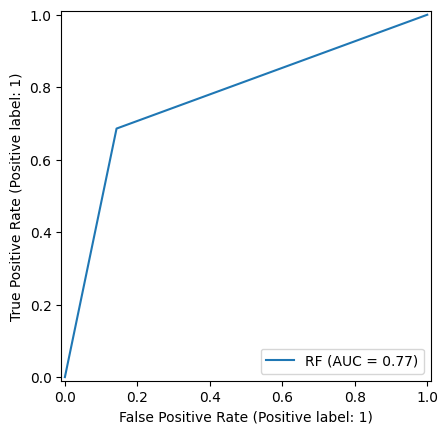

In [ ]:
for name, pipe in pipelines.items():
    # Training the models
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    acc     = accuracy_score(y_test, y_pred)
    roc     = roc_auc_score(y_test, y_pred)

    # ~~~ is OUTSIDE the scope of the main manual ~~~~~~~~~
    #  --- БЛОК ВІДОБРАЖЕННЯ X_train (після трансформації) ---
    if not is_x_train_displayed:
        print("\n--- Перші 3 рядки X_train ПІСЛЯ трансформації ---")
        # 1. Отримати навчений препроцесор з пайплайну
        fitted_preprocessor = pipe.named_steps['preprocessor']
        # 2. Трансформувати X_train
        X_train_transformed = fitted_preprocessor.transform(X_train)
        # 3. Отримати нові назви колонок (важливо після OneHotEncoder)
        # get_feature_names_out() дає назви колонок після трансформації
        feature_names = fitted_preprocessor.get_feature_names_out()
        # 4. Конвертувати результат (який є NumPy array) назад у Pandas DataFrame для зручного перегляду
        X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
        # 5. Показати перші 3 рядки
        display(X_train_transformed_df.head(3))
        print("-" * 40 + "\n")
        # Встановити прапорець, щоб не показувати це знову в наступній ітерації
        is_x_train_displayed = True
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    # Metrics
    print(f'{name} Accuracy: {pipe.score(X_test, y_test):.4f}')
    print("ROC-AUC  :", f"{roc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confustion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0 pred','1 pred'],
                yticklabels=['0 true','1 true'])
    plt.title(f'Confusion Matrix – {name}')
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y_test, y_pred,
                                     name=name,
                                     pos_label=1).plot()
    plt.show()

## **Ensembles**

### **Voting Classifier**

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', pipelines['LR']),
        ('svc', pipelines['SVM']),
        ('gbc', pipelines['GBM']),
        ('rf', pipelines['RF']),
        ('lgb', pipelines['LGB']),
    ],
    voting='hard'  # 'hard' or 'soft' to use probabilities
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 1222, number of negative: 4778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501277 -> initscore=0.005106
[LightGBM] [Info] Start training from score 0.005106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features

VotingClassifier Accuracy: 0.8438
              precision    recall  f1-score   support

           0     0.9066    0.8961    0.9013      3185
           1     0.6115    0.6393    0.6251       815

    accuracy                         0.8438      4000
   macro avg     0.7591    0.7677    0.7632      4000
weighted avg     0.8465    0.8438    0.8450      4000



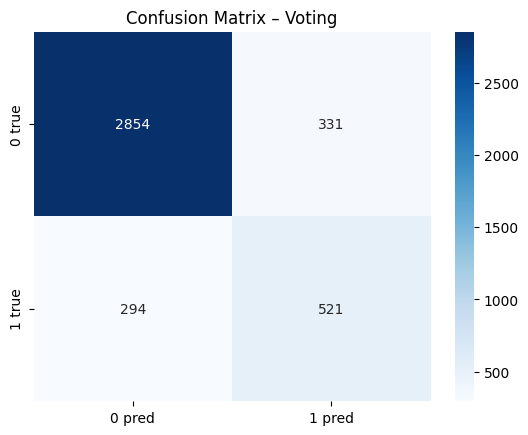

In [ ]:
# Training Voting Classifier
voting_clf.fit(X_train, y_train)
# Predicting
y_pred = voting_clf.predict(X_test)

voting_score = accuracy_score(y_test, y_pred)
print(f'\nVotingClassifier Accuracy: {voting_score:.4f}')
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred','1 pred'],
            yticklabels=['0 true','1 true'])
plt.title(f'Confusion Matrix – Voting')
plt.show()

### **Stacking Classifier**

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', pipelines['LR'].named_steps['classifier']),
        ('svc', pipelines['SVM'].named_steps['classifier']),
        ('gbc', pipelines['GBM'].named_steps['classifier']),
        ('rf', pipelines['RF'].named_steps['classifier']),
        ('lgb', pipelines['LGB'].named_steps['classifier'])
    ],
    final_estimator=pipelines['RF'].named_steps['classifier'],
    cv=5
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 1222, number of negative: 4778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501277 -> initscore=0.005106
[LightGBM] [Info] Start training from score 0.005106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 978, number of negative: 3822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501405 -> initscore=0.005620
[LightGBM] [Info] Start training from score 0.005620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 978, number of negative: 3822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501405 -> initscore=0.005620
[LightGBM] [Info] Start training from score 0.005620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_features
StackingClassifier Accuracy: 0.8173
              precision    recall  f1-score   support

           0     0.9112    0.8537    0.8815      3185
           1     0.5413    0.6748    0.6008       815

    accuracy                         0.8173      4000
   macro avg     0.7263    0.7643    0.7411      4000
weighted avg     0.8358    0.8173    0.8243      4000



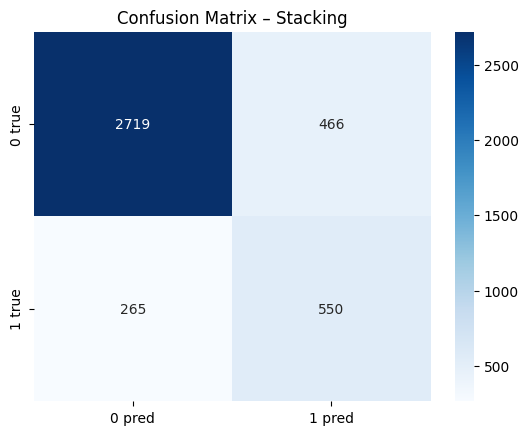

In [ ]:
# Create Pipeline for Stacking
stacking_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

# Training Stacking Model
stacking_pipe.fit(X_train, y_train)

# Predicting
y_pred = stacking_pipe.predict(X_test)

# Metrics
stacking_score = accuracy_score(y_test, y_pred)
print(f'StackingClassifier Accuracy: {stacking_score:.4f}')

print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred','1 pred'],
            yticklabels=['0 true','1 true'])
plt.title(f'Confusion Matrix – Stacking')
plt.show()